In [1]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from skimage.metrics import structural_similarity as ssim

%matplotlib inline

In [2]:
from src.Tile import Tile

# Filtering by aspect ratio

I am assuming that files that I am interested in - nice tiles with nothing else - are square. Of course, this filerting step is not enough on it's own, but it filters out some garbage.

In [3]:
folder = 'azulejo'

In [4]:
files = os.listdir('dataset/{}'.format(folder))

aspect_ratios = [0] * len(files)

i = 0

sample_rectangular = []
sample_square = []

for img_file in files:
    if img_file.endswith(".jpg"):
        img = cv2.imread('dataset/{}/{}'.format(folder, img_file))[...,::-1]
        aspect_ratios[i] = max(
            img.shape[0]*1.0 / img.shape[1],
            img.shape[1]*1.0 / img.shape[0]
        )
        
        if aspect_ratios[i] >= 1.1:
            sample_rectangular.append(img_file)
            
        else:
            sample_square.append(img_file)
        i += 1

if i < len(aspect_ratios):
    aspect_ratios = aspect_ratios[:i]

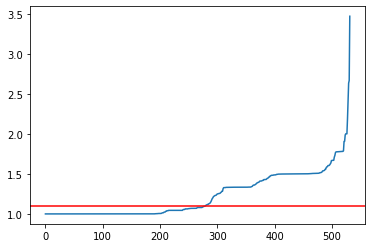

In [5]:
plt.plot(sorted(aspect_ratios));
plt.gca().axhline(1.1, color='red')

In [6]:
sum(np.array(aspect_ratios)<1.1)

279

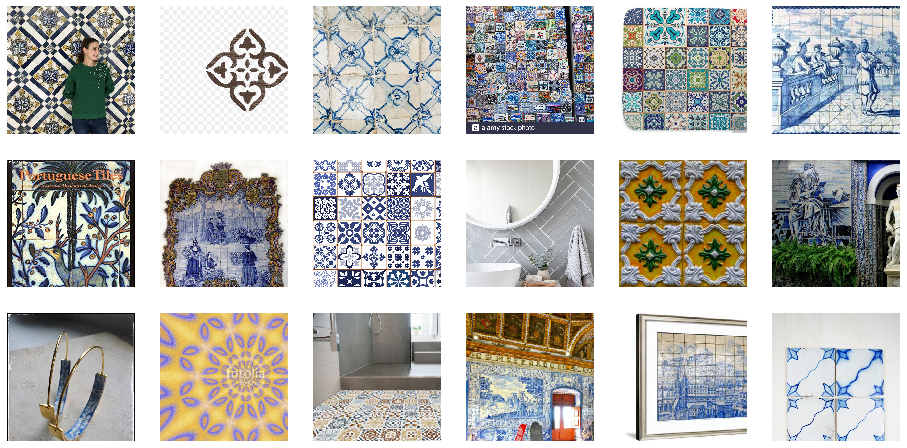

In [7]:
Tile.plot_grid(
    [Tile(cv2.imread('dataset/{}/{}'.format(folder, img_file))[...,::-1]) for img_file in sample_rectangular[:18]],
    cols=6
)

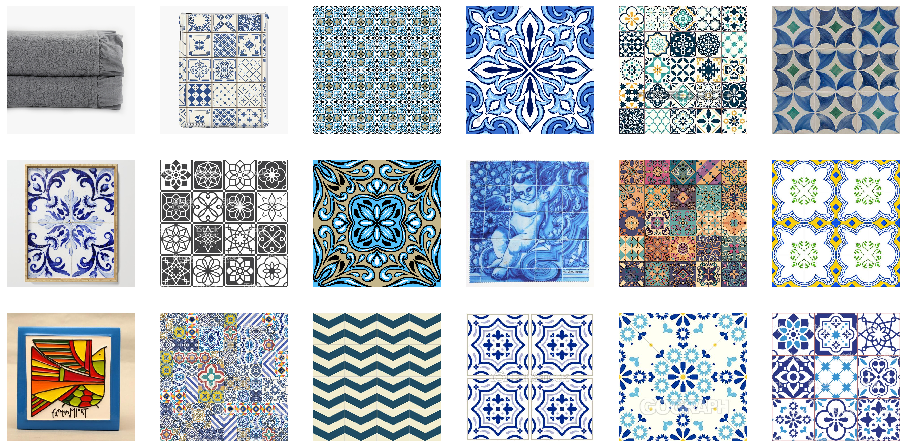

In [8]:
Tile.plot_grid(
    [Tile(cv2.imread('dataset/{}/{}'.format(folder, img_file))[...,::-1]) for img_file in sample_square[:18]],
    cols=6
)

In [9]:
with open('square_{}.txt'.format(folder), 'w') as filehandle:
    for filename in sample_square:
        filehandle.write('%s\n' % filename)